## Supersymmetric quantum machanics

The SMQ wth $N=2$ supercharges can be studied by analysing the spectrum and eigenstates of the SUSY Hamiltonian:

$$H(p_z, q_z)=\{Q,\bar Q^\dagger\},$$
where $Q$ is the supercharge operator:

$$Q_\tau:=(p-iW_\tau(z))b,$$

where $b$ is the spin lowering operator, $p = -i\frac{d}{dz}$ and $W_\tau(z)$ the superpotential. Similarly $\bar Q$.

The **vacua** are the states $\psi$ defined by $\bar Q^\dagger \psi=Q \psi = 0$ because of the definition of the Hamiltonian $H\psi=0$; some may be degenerate.

### Formulation with differential forms (1D model)

The same operators can be described as acting on the space of complex differetial forms (of mixed $p,q$-degree, corresponding to twice the spin):

$$Q_\tau:=(\bar d + d W_\tau \wedge)$$
$$Q^\dagger_\tau:=(-*\bar d* + i_{W_\tau'\partial_z})$$

A gauge field $A$ of a 2D theory with complex coordinate $z$, is thus defined as a section of a line bundle (i.e. one needs to specify the zeros and the poles of the gauge field via a divisor). 

Notice that, by defintion, $\bar d f = \frac{\partial f}{\partial \bar z} d \bar z$ for $f:M \to \mathbb C$.

Also, consider the holomorphic gauge $\bar \partial A = 0$ and thus the line bundles sections are holomorphic ones. 

The space of **vacua** of the theory corresponds to the $Q$-cohomology with $L^2$ coefficients, i.e. $\{\psi | Q_\tau \psi = \bar Q_\tau^\dagger \psi=0 \}$. The space of vacua and the chiral ring are linearly isomorphic (i.e. a combination of BPS states would lead to the vacua: to visualise this, think about the double well and how the vacua will be localised on each valley, while the BPS are not)

![doublewell](https://i.stack.imgur.com/5MV14.png)

To show that $R$ and $V$ are isomorphic, one needs to prove that *all the ground states can be obtained from a "canonical" vacuum by acting on it with all the chiral operators*.

This geometric approach is nice, as the Hilbert space of states of SQM is the space of differential forms over $X$ with $L^2$ coefficients. Indeed, for more than one electron, the Hilbert space of states is (each one with a different coordinate $z$):

$$\bigwedge ^N\Gamma(X, L(D))$$


### Observation
Let's work on the Dolbeault groups $H^{p,q} = H^q(X,\Omega^p)$, hence it makes sense to have objects of the form

$$f(z,\bar z) dz \otimes d\bar z$$


Let us recall that in order to work with Dolbeault coordinates, it is necessary for the base manifold to have a real structure (in complex manifolds it is only possible to define the homolorphic coordinates $z$ and not $\bar z$.)

In [1]:
# Let's define the manifold and then the differential forms over it

M = Manifold(2, 'M', field="real")  # tha manifold has to have a real structure to allow for Hodge theory
U = M.open_subset('U')
c_xy.<x, y> = U.chart() # chart with x,y real coordinate

In [2]:
V = M.open_subset('V')
#M.declare_union(U,V)
c_z.<z, zbar> = V.chart()  # chhart with z and zbar coordinates
trans = c_xy.transition_map(c_z,[1/2*(x + I*y), 1/2*(x-I*y)])  # trnasition maps

trans.display()

z = 1/2*x + 1/2*I*y
zbar = 1/2*x - 1/2*I*y

In [3]:
M.set_default_chart(c_z)  # for variables
M.set_default_frame(c_z.frame())  # for tensors

f0 = M.scalar_field(z^2+zbar, name='f0');  # spin 0 field
f0.add_expr_by_continuation(c_xy,U.intersection(V))  # extension to the other chart

f0.display()

f0: M --> R
on U: (x, y) |--> 1/4*x^2 - 1/4*(-2*I*x + 2*I)*y - 1/4*y^2 + 1/2*x
on V: (z, zbar) |--> z^2 + zbar

In [4]:
df0 = f0.exterior_derivative()
df0.display()

df0.display(c_xy.frame())

df0 = (1/2*x + 1/2*I*y + 1/2) dx + (1/2*I*x - 1/2*y - 1/2*I) dy

## Defining the superpotential

It is an essential modelling step the one of defining the superpotential. Hence, will spend some "cells" on the topic.

Once $W(z)$ is found, then we compute all the needed pieces to compute the supercharges (and then the Hamiltonian).

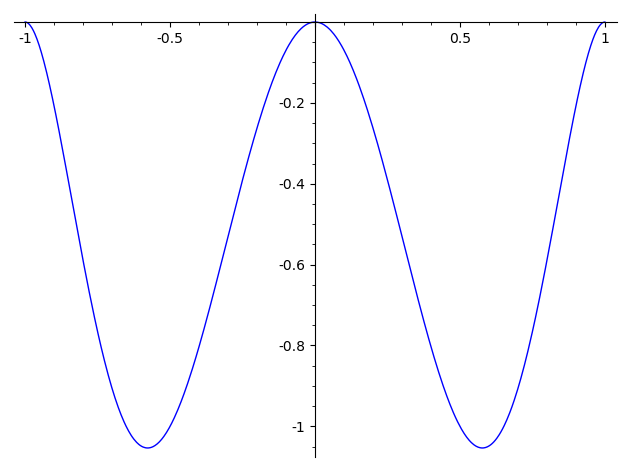

In [5]:
# finding a order 6 perodic potential with maxima in 0, 1, -1 and valley at 1/2, -1/2
var("a1, a2,  a3")
solve([(a1*z^6 + a2*z^4 + a3*z^2).subs(z=1) == 0, 
       (a1*z^6 + a2*z^4 + a3*z^2).subs(z=1/2)==-1, 
       (a1*z^6 + a2*z^4 + a3*z^2).derivative(z).subs(z=1)==0
      ],a1,a2,a3)

# the superpotetial
W=(-64/9)*z^6 + (128/9)*z^4 + (-64/9)*z^2
W.plot()

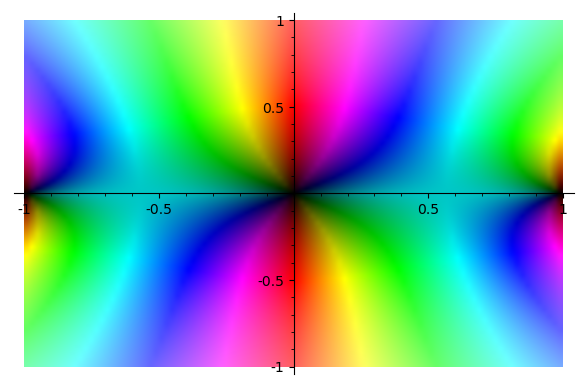

In [6]:
complex_plot(W,(-1,1),(-1,1))

In [7]:
assert not W.subs(z=1+sqrt(-1)/2) - W.subs(z=-1-sqrt(-1)/2)
assert not W.subs(z=1/2+sqrt(-1)) - W.subs(z=-1/2-sqrt(-1))

The idea now is to cosider the potential $W$ defined over the manifold $M$. In this example, we assume $M$ to be obtained by identifying the sides of the quares with opposite orietation. $M$ is topologically a *real projective plae*: this also implies that there is a real structure in the picture!

![image](https://upload.wikimedia.org/wikipedia/commons/9/9b/ProjectivePlaneAsSquare.svg)

In [8]:
# addition of a parameter
var("t3")
W = (-64/9)*z^6 + (128/9)*z^4 + t3*(-64/9)*z^2  # superpotential


dW = W.derivative(z)  # derivative
W_form = M.scalar_field(W)  # Sagemath understands automatically that z is the variable!
W_form.add_expr_by_continuation(c_xy,U.intersection(V))
W_form.display()

M --> R
on U: (x, y) |--> -1/9*x^6 - 2/3*I*x*y^5 + 1/9*y^6 - 1/9*(15*x^2 - 8)*y^4 + 8/9*x^4 + 1/9*(20*I*x^3 - 32*I*x)*y^3 - 16/9*t3*x^2 + 1/9*(15*x^4 - 48*x^2 + 16*t3)*y^2 + 1/9*(-6*I*x^5 + 32*I*x^3 - 32*I*t3*x)*y
on V: (z, zbar) |--> -64/9*z^6 + 128/9*z^4 - 64/9*t3*z^2

In [9]:
# computing dW
dW_form = W_form.differential()  # dW
dW_form.display()

(-128/3*z^5 + 512/9*z^3 - 128/9*t3*z) dz

One can indeed see that the exchange of $z \to \bar z$ yields complex conjugation in the $x,y$-chart.

In [10]:
Wbar = W.subs(z=zbar)
dWbar = Wbar.derivative(zbar)
Wbar_form = M.scalar_field(Wbar)
Wbar_form.add_expr_by_continuation(c_xy,U.intersection(V))  # extend to the other chart
Wbar_form.display()

M --> R
on U: (x, y) |--> -1/9*x^6 + 2/3*I*x*y^5 + 1/9*y^6 - 1/9*(15*x^2 - 8)*y^4 + 8/9*x^4 + 1/9*(-20*I*x^3 + 32*I*x)*y^3 - 16/9*t3*x^2 + 1/9*(15*x^4 - 48*x^2 + 16*t3)*y^2 + 1/9*(6*I*x^5 - 32*I*x^3 + 32*I*t3*x)*y
on V: (z, zbar) |--> -64/9*zbar^6 + 128/9*zbar^4 - 64/9*t3*zbar^2

In [11]:
# computing d \bar W
dWbar_form = Wbar_form.differential()
dWbar_form.add_comp_by_continuation(c_xy.frame(),V.intersection(U),c_xy)
dWbar_form.display()

(-128/3*zbar^5 + 512/9*zbar^3 - 128/9*t3*zbar) dzbar

In [12]:
dWbar_form.display(c_xy.frame())

(-2/3*x^5 - 10/3*x*y^4 + 2/3*I*y^5 + 1/9*(-60*I*x^2 + 32*I)*y^3 + 32/9*x^3 + 4/3*(5*x^3 - 8*x)*y^2 - 32/9*t3*x + 1/9*(30*I*x^4 - 96*I*x^2 + 32*I*t3)*y) dx + (2/3*I*x^5 + 10/3*I*x*y^4 + 2/3*y^5 - 4/9*(15*x^2 - 8)*y^3 - 32/9*I*x^3 + 1/9*(-60*I*x^3 + 96*I*x)*y^2 + 32/9*I*t3*x + 2/9*(15*x^4 - 48*x^2 + 16*t3)*y) dy

In [13]:
def dolbeault_proj(form, p, q):
    """Projection onto the component with dz^p /\ d zbar^q"""
    if form.degree() == 0:
        return form
    if form.degree() == 1:
        form2 = M.diff_form(1, name='form2');  # spin 1/2
        if p == 1:
            form2[0]=form[0]
        else:
            form2[1]=form[1]
        form2.add_comp_by_continuation(c_xy.frame(),U.intersection(V),c_xy)
        return form2
    return form

assert dolbeault_proj(df0,0,1)[1] == 1
assert dolbeault_proj(df0,1,0)[0] == 2*z

def Q(dWbar_form, form):
    """The super charge operator. Raise form deg by 1"""
    if form == 0:
        return 0
    if form.domain().dim() == form.degree():
        return 0
    return dolbeault_proj(form.exterior_derivative(),1,0) + dWbar_form.wedge(form)

def Qbar(dW_form, form):
    """The super charge operator. Raise form deg by 1"""
    if form == 0:
        return 0
    if form.domain().dim() == form.degree():
        return 0
    return dolbeault_proj(form.exterior_derivative(),0,1) + dW_form.wedge(form)

<input>:2: DeprecationWarning: invalid escape sequence \ 
<input>:2: DeprecationWarning: invalid escape sequence \ 
<input>:2: DeprecationWarning: invalid escape sequence \ 
<input>:2: DeprecationWarning: invalid escape sequence \ 
<input>:2: DeprecationWarning: invalid escape sequence \ 
<input>:2: DeprecationWarning: invalid escape sequence \ 
<input>:2: DeprecationWarning: invalid escape sequence \ 
<input>:2: DeprecationWarning: invalid escape sequence \ 
<input>:2: DeprecationWarning: invalid escape sequence \ 
<input>:2: DeprecationWarning: invalid escape sequence \ 
<input>:2: DeprecationWarning: invalid escape sequence \ 
<input>:2: DeprecationWarning: invalid escape sequence \ 
<input>:2: DeprecationWarning: invalid escape sequence \ 
<input>:2: DeprecationWarning: invalid escape sequence \ 
<input>:2: DeprecationWarning: invalid escape sequence \ 
<input>:2: DeprecationWarning: invalid escape sequence \ 
<input>:2: DeprecationWarning: invalid escape sequence \ 
<input>:2: Dep

In order to define the charge adjoint, we need to use the **Hodge start** operator: it requires a metric to be defined.

In [14]:
g = M.metric('g')  # the Euclidean metric on c_z
g[0,0] = 1
g[1,1] = 1
g.display()

g = dz*dz + dzbar*dzbar

In [15]:
g.add_comp_by_continuation(c_xy.frame(),V.intersection(U),c_xy)  # extend the metric on both charts

g.display(c_xy.frame())

g = 1/2 dx*dx - 1/2 dy*dy

In [16]:
dW_vec = M.vector_field()
dW_vec[0] = dW
dW_vec.add_comp_by_continuation(c_xy.frame(),U.intersection(V),c_xy)  # extend to the other chart
dW_vec.display()

(-128/3*z^5 + 512/9*z^3 - 128/9*t3*z) d/dz

In [17]:
dWbar_vec = M.vector_field()
dWbar_vec[1] = dWbar
dWbar_vec.add_comp_by_continuation(c_xy.frame(),U.intersection(V),c_xy)  # extend to ther other chart
dWbar_vec.display()

(-128/3*zbar^5 + 512/9*zbar^3 - 128/9*t3*zbar) d/dzbar

In [18]:
def Qdagger(dWbar_vec, form):
    """The adjoint super charge operator. Lowers form deg by 1"""
    if form == 0:
        return 0
    if form.degree() == 0:
        return 0
    return -dolbeault_proj(((form.hodge_dual(g)).exterior_derivative()).hodge_dual(g),1,0)+dWbar_vec.interior_product(form)

def Qbardagger(dW_vec, form):
    """The adjoint super charge operator. Lowers form deg by 1"""
    if form == 0:
        return 0
    if form.degree() == 0:
        return 0
    return -dolbeault_proj(((form.hodge_dual(g)).exterior_derivative()).hodge_dual(g),0,1)+dW_vec.interior_product(form)

A quantum state is a mixed differential form, where the degree of the forms corresponds to the spin part: a 2-form is a bosonic field of spin 1, whereas a 3-form is a fermionic field with spin $3/2$.

In [19]:
# example of quantum state
f1 = M.scalar_field(z^2, name='f1');  # spin 0
f1.add_expr_by_continuation(c_xy, U.intersection(V))  # extend to both charts
f2 = M.diff_form(1, name='f2');  # spin 1/2
f2[0] = 1 + z + zbar
f2[1] = z
f2.add_comp_by_continuation(c_xy.frame(),U.intersection(V),c_xy)  # extend to both charts
f3 = M.diff_form(2, name='f3');  # spin 1
f3[0,1] = z
f3.add_comp_by_continuation(c_xy.frame(),U.intersection(V),c_xy)  # extend to both charts
psi = M.mixed_form([f1, f2, f3], name='psi')  # quantum state

psi.display_expansion()

psi = [z^2] + [(z + zbar + 1) dz + z dzbar] + [z dz/\dzbar]

In [20]:
psi.display_expansion(c_xy.frame())

psi = [1/4*x^2 + 1/2*I*x*y - 1/4*y^2] + [(3/4*x + 1/4*I*y + 1/2) dx + (1/4*I*x + 1/4*y + 1/2*I) dy] + [(-1/4*I*x + 1/4*y) dx/\dy]

In [21]:
Q(dWbar_form, f2).display()  # the degree is rised by 1 by Q.

(128/3*(z + 1)*zbar^5 + 128/3*zbar^6 - 512/9*(z + 1)*zbar^3 - 512/9*zbar^4 + 128/9*t3*zbar^2 + 128/9*(t3*z + t3)*zbar) dz/\dzbar

In [22]:
# f2 is not a BPS state, as this is not zero
Qbardagger(dW_vec, f2).display()

M --> R
on U: (x, y) |--> -4/3*x^6 - 1/9*(12*I*x + 12*I)*y^5 - 4/3*x^5 - 20/3*(x^2 + x)*y^4 + 64/9*x^4 - 1/9*(-120*I*x^3 - 120*I*x^2 + 64*I*x + 64*I)*y^3 - 64/9*t3*x^2 + 64/9*x^3 + 8/3*(5*x^4 + 5*x^3 - 8*x^2 - 8*x)*y^2 - 64/9*t3*x - 1/9*(60*I*x^5 + 60*I*x^4 - 192*I*x^3 + 64*I*t3*x - 192*I*x^2 + 64*I*t3)*y - 1
on V: (z, zbar) |--> -128/3*z^6 - 128/3*z^5 + 512/9*z^4 - 128/9*t3*z^2 + 512/9*z^3 - 128/9*t3*z - 128/9*(3*z^5 - 4*z^3 + t3*z)*zbar - 1

In [23]:
Q(dWbar_form,f1).display(c_z)

2*z dz + (-128/3*z^2*zbar^5 + 512/9*z^2*zbar^3 - 128/9*t3*z^2*zbar) dzbar

The Hamiltonian is $\{Q,\bar Q^\dagger\}=2H$: let's compute it!

In [24]:
def Hamiltonian(dW_vec, dWbar_form, mixed_form):
    Hpsi = M.mixed_form(name='H.psi')  # quantum state
    lista = []
    for ff in mixed_form:
        #print(ff.display())
        lista.append(Q(dWbar_form, Qbardagger(dW_vec, ff)) + Qbardagger(dW_vec, Q(dWbar_form, ff)))
    for j, item in enumerate(lista):
        Hpsi[j] = 1/2 *item
    return Hpsi

Hpsi = Hamiltonian(dW_vec, dWbar_form, psi)
Hpsi.display_expansion()

H.psi = [-128/3*z^6 + 320/3*z^2*zbar^4 + 512/9*z^4 - 256/3*z^2*zbar^2 - 64/9*t3*z^2 - 1] + [(-128*z^5 - 320/3*z^4 + 1024/9*z^3 - 128/9*t3*z + 256/3*z^2 - 64/9*(15*z^4 - 12*z^2 + t3)*zbar - 64/9*t3) dz] + [(-128*z^5 + 1024/9*z^3 - 128/9*t3*z) dz/\dzbar]

## Braketing

Is the Hilbert space structure compatible with the Kahler one? The answer is actually: yes! The scala product between two quantum states, each defined by a mixed form $\omega_i$, is defined as

$$<i|j> = \int_M * \bar \omega_i \wedge \omega_j$$

In [25]:
# define a new form
f1b = M.scalar_field(zbar, name='f1b');  # spin 0
f1b.add_expr_by_continuation(c_xy, U.intersection(V))
f2b = M.diff_form(1, name='f2b');  # spin 1/2
f2b[0]=1+zbar^2
f2b.add_comp_by_continuation(c_xy.frame(), U.intersection(V),c_xy)
f3b = M.diff_form(2, name='f3b')
f3b[0,1] = 0
f3b.add_comp_by_continuation(c_xy.frame(), U.intersection(V),c_xy)
psib = M.mixed_form([f1b, f2b, f3b], name='psib')  # quantum state

# we integrate over the c_xy chart
def braket_func(psi, psib):
    """braketig with final integration over M"""
    psib_hd=M.mixed_form([psib[2].hodge_dual(g), psib[1].hodge_dual(g), psib[0].hodge_dual(g)])
    fff = psi.wedge(psib_hd)
    # only the correct degree form can be integrated
    espr = fff[2].comp(c_xy.frame())[0,1]
    print("int_M",espr, "dx dy")
    return integral(integral(espr.expr(),y,-1,1),x,-1,1)  # need to integrate over the whole M


braket_func(psi, psib)

int_M 3/16*I*x^3 - 1/16*(I*x + 2*I)*y^2 - 1/16*y^3 + 1/8*I*x^2 + 1/16*(3*x^2 + 4*x)*y + 1/2*I*x + 1/2*I dx dy


2*I

## Power-series method

The method above works only partially. Hence, we shall proceed with a more formal approach: as before, let us cosider $\psi(z) = f_1(z) + f_2(z)dz$. The functions $f_1(z)$ and $f_2(z)$ depend on some coefficients and we want to optimise those:

$$f_i(z):= \sum_j a_{ij}h_j(z),$$

where $h_j(z)$ is the Hermite polynomial basis. Let us solve the polynomial equations directly! Of course, we know that there will anyway be approximation errors...

In [26]:
# set initial basis
nn = 7
kk = nn-2 #must be larger than 1

basis = [hermite(i,z) for i in range(nn)]
variables = ",".join(["x"+str(i) for i in range(nn)]
                     +["y"+str(i) for i in range(nn)]
                     +["v"+str(i) for i in range(nn)]
                     +["u"+str(i) for i in range(nn)])

actual_vars = var(variables)

# initialise SUSY quantum state
f1 = M.scalar_field(sum([eval("x"+str(i))*basis[i] for i in range(nn)]), name='f1');  # spin 0
f2 = M.diff_form(1, name='f2');  # spin 1/2
f3 = M.diff_form(2, name='f3');  # spin 1

f2[0] = sum([eval("y"+str(i))*basis[i] for i in range(nn)])
f2[1] = sum([eval("v"+str(i))*basis[i] for i in range(nn)])
f3[0,1] = sum([eval("u"+str(i))*basis[i] for i in range(nn)])

f1.add_expr_by_continuation(c_xy, U.intersection(V))
f2.add_comp_by_continuation(c_xy.frame(), U.intersection(V),c_xy)
f3.add_comp_by_continuation(c_xy.frame(), U.intersection(V),c_xy)

psi = M.mixed_form([f1, f2, f3], name='psi')  # quantum state
psi.display_expansion()

psi = [2*(2*z^2 - 1)*x2 + 4*(2*z^3 - 3*z)*x3 + 4*(4*z^4 - 12*z^2 + 3)*x4 + 8*(4*z^5 - 20*z^3 + 15*z)*x5 + 8*(8*z^6 - 60*z^4 + 90*z^2 - 15)*x6 + 2*x1*z + x0] + [(2*(2*z^2 - 1)*y2 + 4*(2*z^3 - 3*z)*y3 + 4*(4*z^4 - 12*z^2 + 3)*y4 + 8*(4*z^5 - 20*z^3 + 15*z)*y5 + 8*(8*z^6 - 60*z^4 + 90*z^2 - 15)*y6 + 2*y1*z + y0) dz + (2*(2*z^2 - 1)*v2 + 4*(2*z^3 - 3*z)*v3 + 4*(4*z^4 - 12*z^2 + 3)*v4 + 8*(4*z^5 - 20*z^3 + 15*z)*v5 + 8*(8*z^6 - 60*z^4 + 90*z^2 - 15)*v6 + 2*v1*z + v0) dzbar] + [(2*(2*z^2 - 1)*u2 + 4*(2*z^3 - 3*z)*u3 + 4*(4*z^4 - 12*z^2 + 3)*u4 + 8*(4*z^5 - 20*z^3 + 15*z)*u5 + 8*(8*z^6 - 60*z^4 + 90*z^2 - 15)*u6 + 2*u1*z + u0) dz/\dzbar]

In [27]:
# compute hamiltonian
Hpsi = Hamiltonian(dW_vec, dWbar_form, psi)
Hpsi.display_expansion()

H.psi = [-8192*x6*z^10 - 10240/3*x5*z^9 - 4096/3*(x4 - 38*x6)*z^8 - 512/9*(9*x3 - 260*x5)*z^7 - 512/9*(20*(2*t3 + 75)*x6 + 3*x2 - 68*x4)*z^6 - 128/9*(4*(16*t3 + 285)*x5 + 3*x1 - 66*x3)*z^5 - 64/9*(48*(t3 + 8)*x4 - 45*(32*t3 + 125)*x6 - 32*x2)*z^4 + 320/3*(64*x6*z^6 + 32*x5*z^5 + 16*(x4 - 30*x6)*z^4 + 8*(x3 - 20*x5)*z^3 + 4*(x2 - 12*x4 + 180*x6)*z^2 + 2*(x1 - 6*x3 + 60*x5)*z + x0 - 2*x2 + 12*x4 - 120*x6)*zbar^4 - 64/9*(16*(t3 + 3)*x3 - 5*(64*t3 + 87)*x5 - 8*x1)*z^3 - 32/9*(8*t3*x2 - 3*(32*t3 - 9)*x4 + 90*(16*t3 - 9)*x6)*z^2 - 256/3*(64*x6*z^6 + 32*x5*z^5 + 16*(x4 - 30*x6)*z^4 + 8*(x3 - 20*x5)*z^3 + 4*(x2 - 12*x4 + 180*x6)*z^2 + 2*(x1 - 6*x3 + 60*x5)*z + x0 - 2*x2 + 12*x4 - 120*x6)*zbar^2 + 64/9*t3*x0 - 4/9*(32*t3 + 9)*x2 + 16/3*(16*t3 + 9)*x4 - 80/3*(32*t3 + 27)*x6 - 24*(x3 - 20*x5)*z] + [(-45056/3*y6*z^10 - 20480/3*y5*z^9 - 1024*(3*y4 - 106*y6)*z^8 - 4096/9*(3*y3 - 76*y5)*z^7 - 1792/9*(4*(4*t3 + 255)*y6 + 3*y2 - 52*y4)*z^6 - 256/3*(4*(4*t3 + 125)*y5 + 3*y1 - 34*y3)*z^5 - 320/9*(4*(4*t3

In [28]:
# list of polynomial coefficients coming from equations
eq_list0 = Hpsi[0].expr().coefficients(z)
eq_list1 = Hpsi[1][0].expr().coefficients(z)
eq_list2 = Hpsi[1][1].expr().coefficients(z)
eq_list3 = Hpsi[2][0,1].expr().coefficients(z)

In [29]:
eq_list0

[[320/3*x0*zbar^4 - 640/3*x2*zbar^4 + 1280*x4*zbar^4 - 12800*x6*zbar^4 - 256/3*x0*zbar^2 + 512/3*x2*zbar^2 - 1024*x4*zbar^2 + 10240*x6*zbar^2 + 64/9*t3*x0 - 4/9*(32*t3 + 9)*x2 + 16/3*(16*t3 + 9)*x4 - 80/3*(32*t3 + 27)*x6,
  0],
 [640/3*x1*zbar^4 - 1280*x3*zbar^4 + 12800*x5*zbar^4 - 512/3*x1*zbar^2 + 1024*x3*zbar^2 - 10240*x5*zbar^2 - 24*x3 + 480*x5,
  1],
 [1280/3*x2*zbar^4 - 5120*x4*zbar^4 + 76800*x6*zbar^4 - 1024/3*x2*zbar^2 + 4096*x4*zbar^2 - 61440*x6*zbar^2 - 256/9*t3*x2 + 32/3*(32*t3 - 9)*x4 - 320*(16*t3 - 9)*x6,
  2],
 [2560/3*x3*zbar^4 - 51200/3*x5*zbar^4 - 2048/3*x3*zbar^2 + 40960/3*x5*zbar^2 - 1024/9*(t3 + 3)*x3 + 320/9*(64*t3 + 87)*x5 + 512/9*x1,
  3],
 [5120/3*x4*zbar^4 - 51200*x6*zbar^4 - 4096/3*x4*zbar^2 + 40960*x6*zbar^2 - 1024/3*(t3 + 8)*x4 + 320*(32*t3 + 125)*x6 + 2048/9*x2,
  4],
 [10240/3*x5*zbar^4 - 8192/3*x5*zbar^2 - 512/9*(16*t3 + 285)*x5 - 128/3*x1 + 2816/3*x3,
  5],
 [20480/3*x6*zbar^4 - 16384/3*x6*zbar^2 - 10240/9*(2*t3 + 75)*x6 - 512/3*x2 + 34816/9*x4,
  6],
 [

In [30]:
# list of solutions
sols0 = solve([eq_list0[j][0]==0 for j in range(nn-kk)],*actual_vars[:nn])
sols1 = solve([eq_list1[j][0]==0 for j in range(nn-kk)],*actual_vars[nn:2*nn])
sols2 = solve([eq_list2[j][0]==0 for j in range(nn-kk)],*actual_vars[2*nn:3*nn])
sols3 = solve([eq_list3[j][0]==0 for j in range(nn-kk)],*actual_vars[3*nn:])
sols1

[[y0 == 1/16*(32*(r10 + 60*r6 - 6*r8)*t3 - 9*r10 - 1620*r6 + 108*r8)/t3, y1 == -3/32*(64*(10*r7 - r9)*t3 - 180*r7 + 9*r9)/t3, y2 == r10, y3 == r9, y4 == r8, y5 == r7, y6 == r6]]

In [31]:
params_list_s0 = []
for item in sols0[0][-kk+1:]:
    params_list_s0.append(item.right())
# set these parametters to zero

param_sols0 = solve(params_list_s0,*params_list_s0)

In [32]:
params_list_s1 = []
for item in sols1[0][-kk+1:]:
    params_list_s1.append(item.right())
# set these parametters to zero

param_sols1 = solve(params_list_s1,*params_list_s1)

In [33]:
params_list_s2 = []
for item in sols2[0][-kk+1:]:
    params_list_s2.append(item.right())
# set these parametters to zero

param_sols2 = solve(params_list_s2,*params_list_s2)

In [34]:
params_list_s3 = []
for item in sols3[0][-kk+1:]:
    params_list_s3.append(item.right())
# set these parametters to zero

param_sols3 = solve(params_list_s3,*params_list_s3)

In [35]:
f1 = M.scalar_field(psi[0].expr().subs(sols0).subs(param_sols0), name='f1');  # spin 0
f1.add_expr_by_continuation(c_xy, U.intersection(V))
f1.display()

f1: M --> R
on U: (x, y) |--> (15*r5*x^6 - 60*I*r5*x^3*y^3 - 30*I*r5*x*y^5 - 15*r5*y^6 - 48*r5*x^4 - 3*(5*r5*x^2 + 16*r5)*y^4 + 16*r5*t3*x^2 + (15*r5*x^4 - 96*r5*x^2 - 16*r5*t3)*y^2 - (30*I*r5*x^5 - 32*I*r5*t3*x)*y + 9*r5)/(15*x^4 + 60*I*x*y^3 + 15*y^4 - 6*(15*x^2 - 8)*y^2 - 48*x^2 + (-60*I*x^3 + 96*I*x)*y + 16*t3)
on V: (z, zbar) |--> 2*(2*z^2 - 1)*r5 + 1/16*(480*r5*zbar^4 - 384*r5*zbar^2 + 32*r5*t3 + 9*r5)/(15*zbar^4 - 12*zbar^2 + t3)

In order to acquire the last paraemter, we normlise the integral of the components over $M$. Notice that we are assuming $M$ to be compact: in particular it is the torus.

In [36]:
# Normalisation
final_sol0 = solve(integral(integral((conjugate(f1.expr(c_xy))*f1.expr(c_xy)).taylor((x,1/10),(y,1/10),10).full_simplify(),x,-1,1),y,-1,1)==1,sols0[0][-kk].right())
final_sol0


[r5 == -805306368000000000000000000000000000000*t3^10*sqrt(24640000000*t3^2/(39771180222917793284096000000000000000000000000000000000000000000000000000000000000000000*t3^22 - 328112236839071794593792000000000000000000000000000000000000000000000000000000000000000*t3^21 - 35725896084448094097814585344000000000000000000000000000000000000000000000000000000000000*t3^20 - 133407478893915140088142642544640000000000000000000000000000000000000000000000000000000000*t3^19 + 613558933015083140439605819096432640000000000000000000000000000000000000000000000000000000*t3^18 + 1278453322970916973036591169381792219136000000000000000000000000000000000000000000000000000*t3^17 - 2972079793834620311182690606044055791992832000000000000000000000000000000000000000000000000*t3^16 - 744410243257235365919989027057409323689836544000000000000000000000000000000000000000000000*t3^15 + 2462959661922923581158525709930332716190211768320000000000000000000000000000000000000000000*t3^14 - 1205323332342450080975519689019544

In [37]:
f1 = M.scalar_field(psi[0].expr().subs(sols0).subs(param_sols0).subs(final_sol0[0]), name='f1');  # spin 0
f1.add_expr_by_continuation(c_xy, U.intersection(V))
#f1.display()

In [38]:
f2 = M.diff_form(1, name='f2');  # spin 1/2
f2[0] = psi[1][0].expr().subs(sols1).subs(param_sols1)
f2[1] = psi[1][1].expr().subs(sols2).subs(param_sols2)
f2.add_comp_by_continuation(c_xy.frame(), U.intersection(V), c_xy)
f2.display()

f2 = (2*(2*z^2 - 1)*r10 + 1/16*(32*r10*t3 - 9*r10)/t3) dz + r15 dzbar

In [39]:
f2.display(c_xy.frame())

f2 = 1/32*(16*r10*t3*x^2 + 32*I*r10*t3*x*y - 16*r10*t3*y^2 + 16*r15*t3 - 9*r10)/t3 dx + 1/32*(16*I*r10*t3*x^2 - 32*r10*t3*x*y - 16*I*r10*t3*y^2 - 16*I*r15*t3 - 9*I*r10)/t3 dy

In [40]:
# Normalisation
final_sol1 = solve([integral(integral((conjugate(f2.comp(c_xy.frame())[0].expr())*f2.comp(c_xy.frame())[0].expr()).taylor((x,1/10),(y,1/10),10).full_simplify(),x,-1,1),y,-1,1)==1,
                    integral(integral((conjugate(f2.comp(c_xy.frame())[1].expr())*f2.comp(c_xy.frame())[1].expr()).taylor((x,1/10),(y,1/10),10).full_simplify(),x,-1,1),y,-1,1)==1],
                   sols1[0][-kk].right(),sols2[0][-nn].right())



f2 = M.diff_form(1, name='f2');  # spin 1/2
f2[0] = psi[1][0].expr().subs(sols1).subs(param_sols1).subs(final_sol1[0])
f2[1] = psi[1][1].expr().subs(sols2).subs(param_sols2).subs(final_sol1[0])
f2.add_comp_by_continuation(c_xy.frame(), U.intersection(V), c_xy)
f2.display()


f2 = (-96*sqrt(5)*(2*z^2 - 1)*t3/sqrt(7168*t3^2 + 3645) - 3*(32*sqrt(5)*t3^2/sqrt(7168*t3^2 + 3645) - 9*sqrt(5)*t3/sqrt(7168*t3^2 + 3645))/t3) dz

In [41]:
psi2 = M.mixed_form([f1, f2, 0], name='psi2')  # quantum state

psi2.display_expansion()

psi2 = [-3/2*(1073741824000000000000000000000000000000*t3^10*sqrt(24640000000*t3^2/(39771180222917793284096000000000000000000000000000000000000000000000000000000000000000000*t3^22 - 328112236839071794593792000000000000000000000000000000000000000000000000000000000000000*t3^21 - 35725896084448094097814585344000000000000000000000000000000000000000000000000000000000000*t3^20 - 133407478893915140088142642544640000000000000000000000000000000000000000000000000000000000*t3^19 + 613558933015083140439605819096432640000000000000000000000000000000000000000000000000000000*t3^18 + 1278453322970916973036591169381792219136000000000000000000000000000000000000000000000000000*t3^17 - 2972079793834620311182690606044055791992832000000000000000000000000000000000000000000000000*t3^16 - 744410243257235365919989027057409323689836544000000000000000000000000000000000000000000000*t3^15 + 2462959661922923581158525709930332716190211768320000000000000000000000000000000000000000000*t3^14 - 120532333234245008097551968

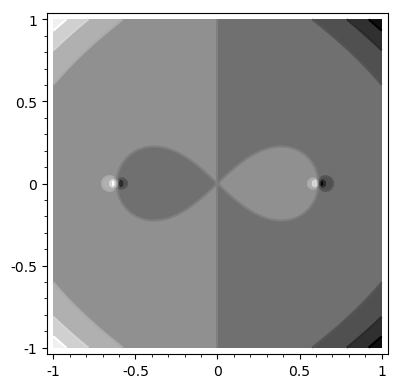

In [42]:
sss = Q(dWbar_form, psi2[0]).comp(c_xy.frame())[0].expr()
contour_plot(real(sss.subs(t3 = 1)), (x,-1,1), (y,-1,1))

In [43]:
# these plots should be zero as Q psi = 0!
plot_list = [contour_plot(real(sss.subs(t3 = par)),(x,-1,1),(y,-1,1)) for par in [-1,-0.5,0,0.5,1] ]

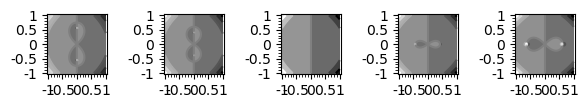

In [44]:
graphics_array(plot_list)

In [45]:
# these plots should be zero as Q^dagger psi = 0!
sss = Qdagger(dWbar_vec, psi2[1]).expr(c_xy)
plot_list = [contour_plot(real(sss.subs(t3 = par)),(x,-1,1),(y,-1,1)) for par in [-1,-0.5,0,0.5,1] ]

/home/sage/sage/local/lib/python3.7/site-packages/matplotlib/contour.py:1226: UserWarning: No contour levels were found within the data range.
  warnings.warn("No contour levels were found"


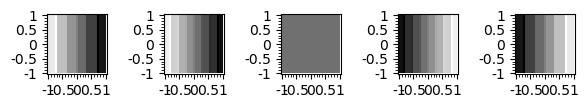

In [46]:
graphics_array(plot_list)

In [ ]:
# plot of 0-th components at different parameter values

Hpsi2 = Hamiltonian(dW_vec, dWbar_form, psi2)
# the red curve is expected to be zero!
plot_list = [contour_plot(real(psi2[0].expr(c_xy).subs(t3=par)),(x,-1,1),(y,-1,1)) + contour_plot(real(Hpsi2[0].expr(c_xy).subs(t3=par)),(x,-1,1),(y,-1,1)) for par in [-1,-0.5,0,0.5,1]]

In [ ]:
graphics_array(plot_list)

## Chiral ring and vacuum bundle

The chiral ring $R$, whose fibers are $R_{\tau}$, is a subbundle of $End(V)$ (as $R_{\tau}$ acts on $V_{\tau}$ fiberwise), where $V$ is the vacuum bundle over the parameter space (the space where $\tau$ is the coordinate).

The isomorphism $V = R$ is called the *Spectral flow*.

### Monodromy representation

When moving around the parameter space, we pass through theories with different configurations of defects. This also corresponds to moving one defect around another! Hece, the monodromy representation of the Berry connection gives the statistical properties of the defects (are they fermions, bosons or anyons?)!

The Berry connection is defined as

$$A_{ijk}=<\bar i|\partial_{\tau_k}|j>$$

The monodromy is given by the parallel transport via the Berry connection and is represented over the vacuum bundle, i.e. the Hilbert space of the vacua of the theory (the fibers are the vacua for fixed parameters).

#### Observation:

The Stokes phenomenon, if present, corresponds to the "Wall crossing".

In [ ]:
# setting |j> :
f1 = M.scalar_field(psi2[0].expr().derivative(t3).simplify(), name='f1');  # spin 0
f2 = M.diff_form(1, name='f2');  # spin 1/2
f2[0] = psi2[1][0].expr().derivative(t3).simplify()  
f2[1] = psi2[1][1].expr().derivative(t3).simplify()

f1.add_expr_by_continuation(c_xy, U.intersection(V))

f2.add_comp_by_continuation(c_xy.frame(), U.intersection(V),c_xy)

psi3 = M.mixed_form([f1, f2, 0], name='psi3')  # this is d_t3|j>

berry_ijt3 = braket_func(psi2, psi3)  # z should disappear when inetgrating over M

contour_plot(berry_ijt3, (x,-1,1), (y,-1,1))

## $tt^*$ equations

Given the Berry connection $D:= \partial - A$ and the 1-form $C$, obtained by summing up all chiral operators $\Phi_j$, $C:=\sum_j \Phi_j d\tau^j$ we get

$$C \wedge C = DC = \bar DC =0$$
$$D \bar D + \bar DD + C \wedge \bar C + \bar C \wedge C=0$$
$$DD = \bar D\bar D =0$$

# Appendix 1: standard harmonic oscillator

To make sure that the power series method yields reasonable results, we double check it with the much simpler standard harmonic oscillator.

Below we propose a simple version of the algorithm used above, to convice the reader that it should work.

In [ ]:
nn=30
kk=4

var("zz")
variables = ",".join(["x"+str(i) for i in range(nn)])

actual_vars = var(variables)
basis = [zz^i for i in range(nn)]

f = sum([eval("x"+str(i))*basis[i] for i in range(nn)])

f

In [ ]:
Hf = -f.derivative(zz,2)/2 + 4*zz^2/2*f - 10*f  # hamiltonian - Ef

lista_coeff_eq = Hf.coefficients(zz)
lista_coeff_eq

In [ ]:
# list of solutions Hf=0
sols0 = solve([lista_coeff_eq[j][0]==0 for j in range(nn-kk)], *actual_vars[:nn])
sols0

In [ ]:
params_list_s0 = []
for item in sols0[0][-kk+1:]:
    params_list_s0.append(item.right())
# set these parametters to zero

param_sols0 = solve(params_list_s0, *params_list_s0)

ff = f.subs(sols0).subs(param_sols0)
ff

In [ ]:
ssd=solve(integral(ff^2,zz,-1,1)==0.7,sols0[0][-kk].right())
ssd

ff2 = f.subs(sols0).subs(param_sols0).subs(ssd[0])

ff2.plot()

In [ ]:
## Exact solution for E = 1

var("E")
f2 = exp(-zz^2)/2
eq = -f2.derivative(zz,2)/2 + 4*zz^2/2*f2 - E*f2
eq

In [ ]:
eq.subs(E=1)  # indeed a solution

f2.plot()

In [ ]:
# reproducig the results
f2.taylor(zz,0,nn)

# Appendix 2: Path integral formulation of SQM

Let's consider each pair of position and momumentum as describinng a particle whose proper time is $t$. Hence, a particle is described by the trajectory of

$$(q_z(t'), q_z(t)), t \in \mathbb R$$

## Lagrangian from Hamiltonian

We apply the Legendre transform to obtain the Lagrangian of the system:

$$L(z,z')=p_z q_z' + H(p_z,q_z) = p_z \frac{\partial H(p_z,q_z)}{\partial p_z} + H(p_z,q_z)$$

Let us recall that the **path integral** takes this form:

$$\int_S e^{\int_{t} L_\tau(q_z',q_z) dt} dq_z.$$

Here $S$ is the space of all trajectories (in general, smooth ones). The integral $\int_{t} L_\tau(q_z',q_z) dt$ is called action.

## Numerical computations

We can solve the path integral by a Metropolis Hastings algorithms. We start by creating a path in the space $S$ and weight it -- in the final path integral sum -- accordingly to the weight $e^{-S}$. Then we simulate another path. If the other path is completely independent of the initl one, then we are probably not properly sampling the space $S$: we need to use the idea of Markov processes to properly sample the space $S$, by modifying the previous one to get the next one and accept the path only if:
 - the energy is lower
 - if the energy (the action in our case, i.e. the measure n the space $S$) is higher, then we accept the path only if $p<e^{\Delta E}$, $p \sim U[0,1]$

Since we can simulate the path integral, we also have access to all the quantities that can be derived from it: energies, lowest energy eigenstates, correlators... It is just a matter of summng together the proper quantities with the proper weights.